# [Your Project Title]

**Student:** [Your Name]  
**Course:** AI001  
**Date:** [Date]

## Problem Statement
[Describe the problem you're solving - classification, regression, etc.]

## Dataset
- **Source:** [Dataset name and URL]
- **Size:** [Number of samples/features]
- **Domain:** [Images/Text/Audio/Tabular]

## Objectives
- [Objective 1]
- [Objective 2]
- [Objective 3]

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# ML libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


# 1. Data Exploration

Let's start by exploring our dataset to understand its structure and characteristics.

In [2]:
# Load your dataset here
# Example with sample data - replace with your actual dataset
from sklearn.datasets import make_classification

# Generate sample dataset (replace this with your actual data loading)
X, y = make_classification(
    n_samples=1000, 
    n_features=10, 
    n_informative=5, 
    n_redundant=3, 
    n_classes=3, 
    random_state=42
)

# Convert to DataFrame
feature_names = [f'feature_{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (1000, 11)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,-3.678435,-1.066032,1.966002,-2.092658,-1.124700,-0.051542,1.124292,-1.608562,-1.028816,0.970581,2
1,1.575099,-0.618160,0.779082,0.916792,-0.689770,0.898512,0.178608,1.258445,1.437636,0.487085,2
2,-0.197321,1.191091,1.417739,-0.540792,-1.098688,-0.146854,-0.799354,0.806564,-1.117196,-1.586110,1
3,-2.016939,0.500917,2.189540,-1.427866,-1.017642,-0.982324,0.546948,-0.517931,-0.072470,0.435570,2
4,-0.027062,-0.029216,0.768419,-0.840496,-1.417443,0.775115,-0.130300,-0.062112,2.012378,2.062746,1


In [3]:
# Basic dataset information
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Target distribution:\n{df['target'].value_counts()}")

# Statistical summary
df.describe()

Dataset Info:
Shape: (1000, 11)
Missing values: 0
Target distribution:
target
1    336
0    334
2    330
Name: count, dtype: int64


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,-0.541015,-0.019375,0.686381,0.008215,-0.640862,-0.057886,0.610198,0.043431,-0.301548,0.299394,0.99600
std,2.028409,1.037613,1.579925,1.494060,1.490946,1.009826,1.931199,1.414826,1.685758,1.640825,0.81526
min,-7.371309,-3.221016,-4.867546,-4.298883,-5.520164,-2.899514,-6.873771,-4.189445,-5.842761,-4.859100,0.00000
25%,-1.951800,-0.722399,-0.353118,-1.084390,-1.557339,-0.747616,-0.649411,-0.884602,-1.343442,-0.881701,0.00000
50%,-0.481235,-0.060376,0.699202,-0.113327,-0.794267,-0.044317,0.662099,0.116933,-0.342376,0.384230,1.00000
75%,0.871894,0.688677,1.674551,1.018475,0.128637,0.659203,1.810872,0.966039,0.840851,1.494752,2.00000
max,5.473215,3.098299,5.883987,5.498877,5.472881,3.529055,8.566754,4.309566,4.605669,5.207157,2.00000


/var/folders/h2/4n19j41n6dxg73lj5xpbvsfr0000gn/T/ipykernel_83591/3205950643.py:16: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[feature_names[:4]].hist(bins=20, ax=axes[1,0], alpha=0.7)


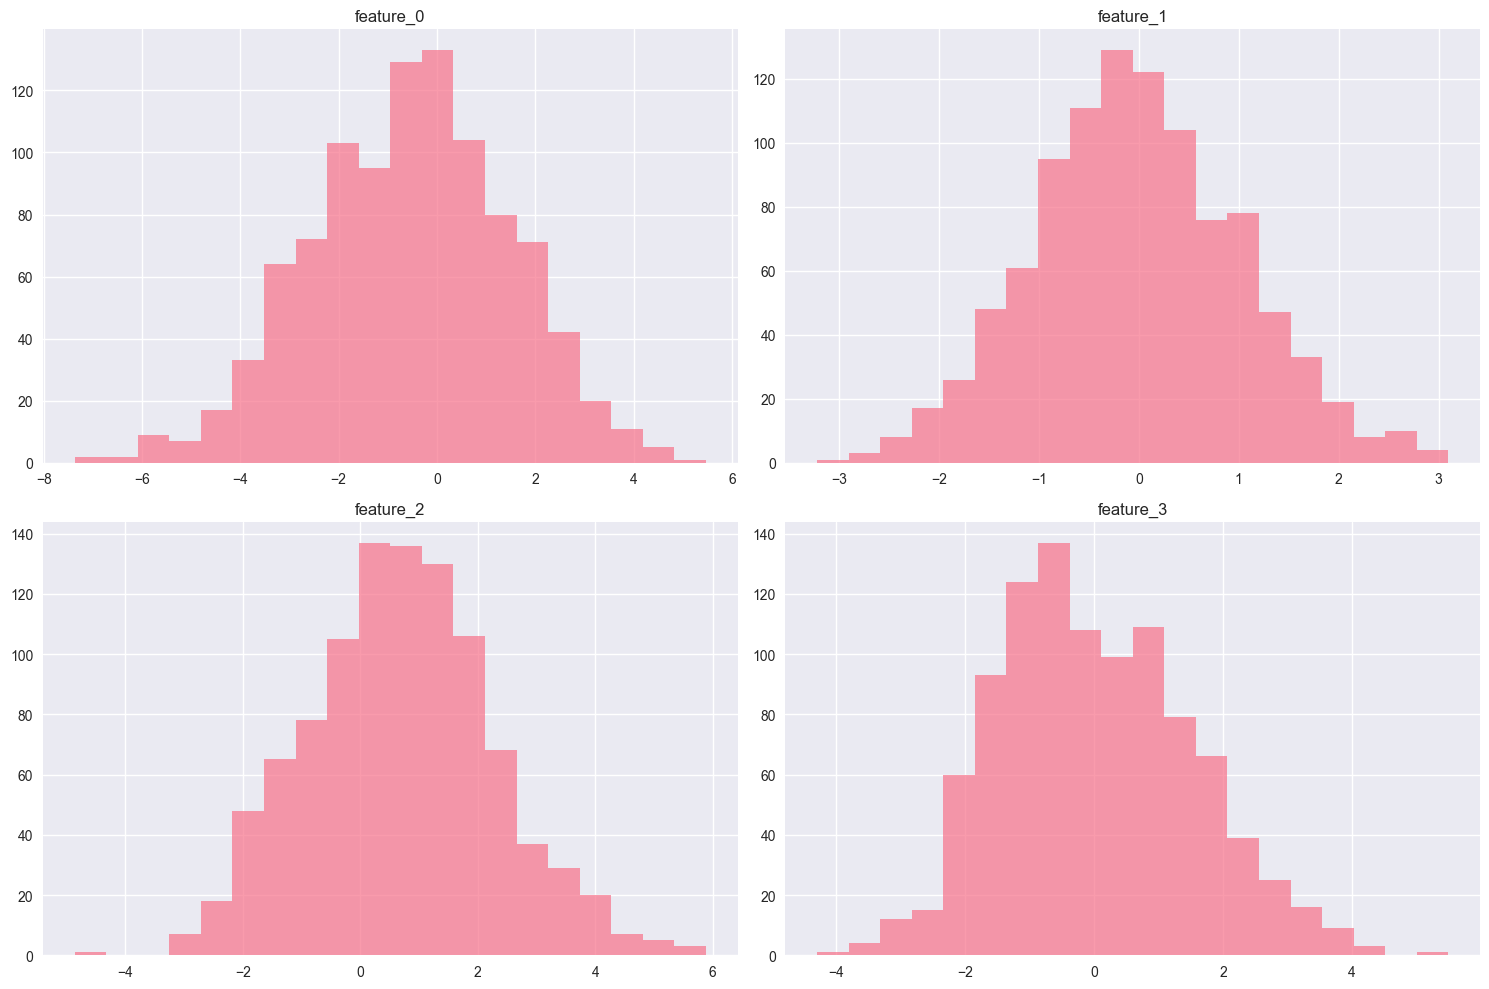

In [4]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Target distribution
df['target'].value_counts().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Target Distribution')
axes[0,0].set_xlabel('Target Class')
axes[0,0].set_ylabel('Count')

# Feature correlations
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[0,1])
axes[0,1].set_title('Feature Correlations')

# Feature distributions
df[feature_names[:4]].hist(bins=20, ax=axes[1,0], alpha=0.7)
axes[1,0].set_title('Feature Distributions (First 4)')

# Box plot
df.boxplot(column=feature_names[:5], ax=axes[1,1])
axes[1,1].set_title('Box Plot (First 5 Features)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [5]:
# Interactive plotly visualization
# Note: If this fails, run: uv add nbformat

try:
    fig = px.scatter_matrix(
        df[feature_names[:4] + ['target']], 
        dimensions=feature_names[:4],
        color='target',
        title='Interactive Feature Scatter Matrix'
    )
    fig.show()
except ValueError as e:
    if "nbformat" in str(e):
        print("Please install nbformat for plotly: run 'uv add nbformat' then restart kernel")
        # Fallback to matplotlib
        pd.plotting.scatter_matrix(
            df[feature_names[:4]], 
            c=df['target'], 
            figsize=(12, 8), 
            alpha=0.7
        )
        plt.suptitle('Feature Scatter Matrix (Matplotlib Fallback)')
        plt.show()
    else:
        raise e

# 2. Methodology

## Data Splitting Strategy
- **Training Set:** 60% for model training
- **Validation Set:** 20% for hyperparameter tuning
- **Test Set:** 20% for final evaluation

## Models to Compare
1. **Logistic Regression** (Baseline)
2. **Random Forest** (Ensemble method)
3. **Support Vector Machine** (Kernel-based)

## Evaluation Metrics
- Accuracy
- Precision, Recall, F1-score
- Confusion Matrix

In [7]:
# Prepare features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

Training set: (600, 10)
Validation set: (200, 10)
Test set: (200, 10)


# 3. Model Implementation

Let's implement and train multiple models for comparison.

In [8]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42)
}

# Train models and store results
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    train_pred = model.predict(X_train_scaled)
    val_pred = model.predict(X_val_scaled)
    
    # Store results
    results[name] = {
        'model': model,
        'train_accuracy': accuracy_score(y_train, train_pred),
        'val_accuracy': accuracy_score(y_val, val_pred),
        'val_predictions': val_pred
    }
    
    print(f"Train Accuracy: {results[name]['train_accuracy']:.4f}")
    print(f"Validation Accuracy: {results[name]['val_accuracy']:.4f}")


Training Logistic Regression...
Train Accuracy: 0.7233
Validation Accuracy: 0.6800

Training Random Forest...
Train Accuracy: 1.0000
Validation Accuracy: 0.8450

Training SVM...
Train Accuracy: 0.8883
Validation Accuracy: 0.8500


# 4. Results and Analysis

Let's analyze and compare the performance of our models.

Model Comparison:
                 Model  Train Accuracy  Validation Accuracy
0  Logistic Regression        0.723333                0.680
1        Random Forest        1.000000                0.845
2                  SVM        0.888333                0.850


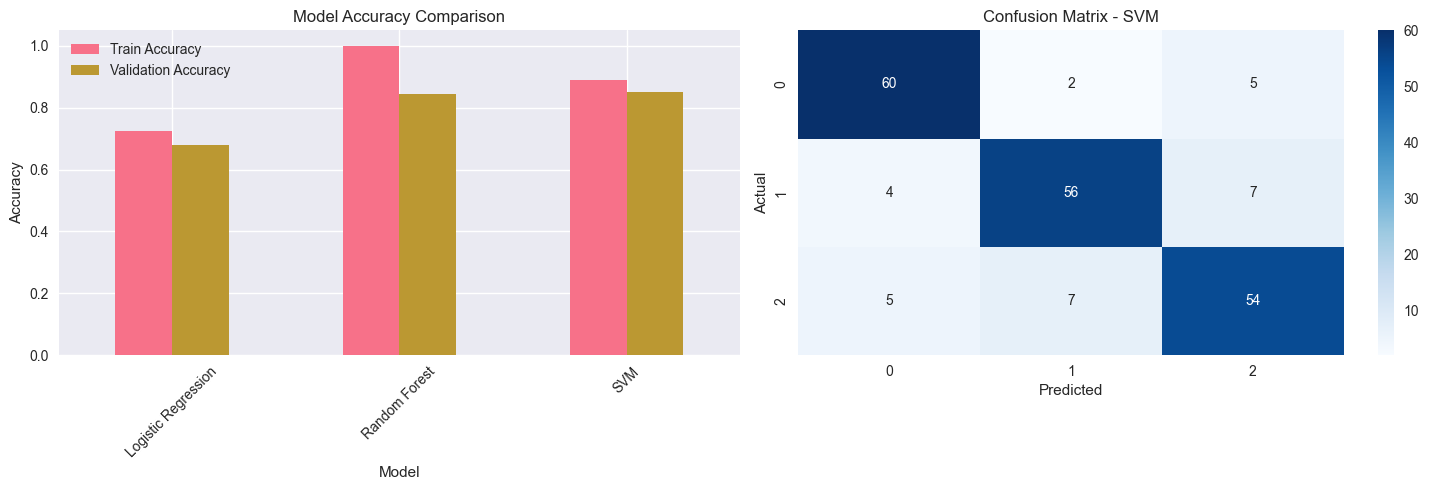


Best Model: SVM
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        67
           1       0.86      0.84      0.85        67
           2       0.82      0.82      0.82        66

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



In [9]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train Accuracy': [results[model]['train_accuracy'] for model in results.keys()],
    'Validation Accuracy': [results[model]['val_accuracy'] for model in results.keys()]
})

print("Model Comparison:")
print(comparison_df)

# Visualize comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy comparison
comparison_df.set_index('Model')[['Train Accuracy', 'Validation Accuracy']].plot(
    kind='bar', ax=ax1, title='Model Accuracy Comparison'
)
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.set_xticklabels(comparison_df['Model'], rotation=45)

# Best model confusion matrix
best_model_name = comparison_df.loc[comparison_df['Validation Accuracy'].idxmax(), 'Model']
best_predictions = results[best_model_name]['val_predictions']

cm = confusion_matrix(y_val, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title(f'Confusion Matrix - {best_model_name}')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

print(f"\nBest Model: {best_model_name}")
print(f"Classification Report for {best_model_name}:")
print(classification_report(y_val, best_predictions))

In [10]:
# Test the best model on test set
best_model = results[best_model_name]['model']
test_predictions = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Final Test Accuracy ({best_model_name}): {test_accuracy:.4f}")
print("\nFinal Test Classification Report:")
print(classification_report(y_test, test_predictions))

Final Test Accuracy (SVM): 0.8800

Final Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        67
           1       0.84      0.93      0.88        67
           2       0.93      0.86      0.90        66

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



# 5. AI Tooling Reflection

## AI Tools Used
- **[Tool Name]:** [How you used it - code generation, debugging, etc.]
- **[Tool Name]:** [Specific examples of assistance]

## Impact on Development
- **Speed:** [How AI tools affected your development speed]
- **Learning:** [What you learned through AI assistance]
- **Challenges:** [Any limitations or issues with AI tools]

## Code Generated with AI
[Mention specific sections where AI helped generate or improve code]

# 6. Conclusions

## Key Findings
- [Finding 1 - which model performed best and why]
- [Finding 2 - interesting patterns in the data]
- [Finding 3 - unexpected results or insights]

## Model Performance Summary
- **Best Model:** [Model name] with [accuracy]% test accuracy
- **Key Factors:** [What made this model successful]

## Limitations
- [Limitation 1 - dataset size, quality, etc.]
- [Limitation 2 - model complexity, computational constraints]
- [Limitation 3 - evaluation methodology]

## Future Work
- [Improvement 1 - more data, feature engineering]
- [Improvement 2 - advanced models, hyperparameter tuning]
- [Improvement 3 - deployment considerations]

## Broader Implications
[How this work could be applied in real-world scenarios]

---
---